In [2]:
%pip install git+https://github.com/apaleyes/covid19_datasets.git

  Cloning https://github.com/apaleyes/covid19_datasets.git to /tmp/pip-req-build-ao58imi6
  Running command git clone -q https://github.com/apaleyes/covid19_datasets.git /tmp/pip-req-build-ao58imi6
  Created wheel for covid19-datasets: filename=covid19_datasets-0.1-py3-none-any.whl size=5388 sha256=3c6d3edcc22c9310ff3f93d1f0dfea7d4524990e89356ea13aa05ba235095a6a
  Stored in directory: /tmp/pip-ephem-wheel-cache-me27hp1z/wheels/ed/fc/48/2964ce056644e54248203fab61b72c46ddcf37df4659a4ff83
Successfully built covid19-datasets
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# optional - see log messages about datasets loading

import logging
import sys
logging.basicConfig(stream=sys.stdout, level=logging.INFO)

### Oxford Government Policy Tracker

In [4]:
from covid19_datasets import OxfordGovernmentPolicyDataset

/home/andrei/.local/share/virtualenvs/covid-19-ERD70gzE/lib/python3.6/site-packages/pandas_datareader-0.8.1-py3.6.egg/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [15]:
ogp = OxfordGovernmentPolicyDataset()

INFO:covid19_datasets.oxford_government_policy:Loading dataset from https://ocgptweb.azurewebsites.net/CSVDownload


HTTPError: HTTP Error 403: Site Disabled

In [ ]:
country = 'South Africa'

fig, ax = plt.subplots(figsize=(24, 6))
ogp.get_country_data(country).ConfirmedCases.plot(ax=ax)

policy_changes = ogp.get_country_policy_changes(country)

for c in policy_changes.columns:
    policy = policy_changes.loc[:, c]
    policy = policy[policy]
    if policy.any():
        for d in policy.index:
            print(f'Policy {c} changed on {d}')
            ax.axvline(d, color='k', ls='--')

### World Bank Data

In [8]:
from covid19_datasets import WorldBankDataBank, AGGREGATES

In [9]:
wbdb = WorldBankDataBank()

INFO:covid19_datasets.world_bank:Loading dataset


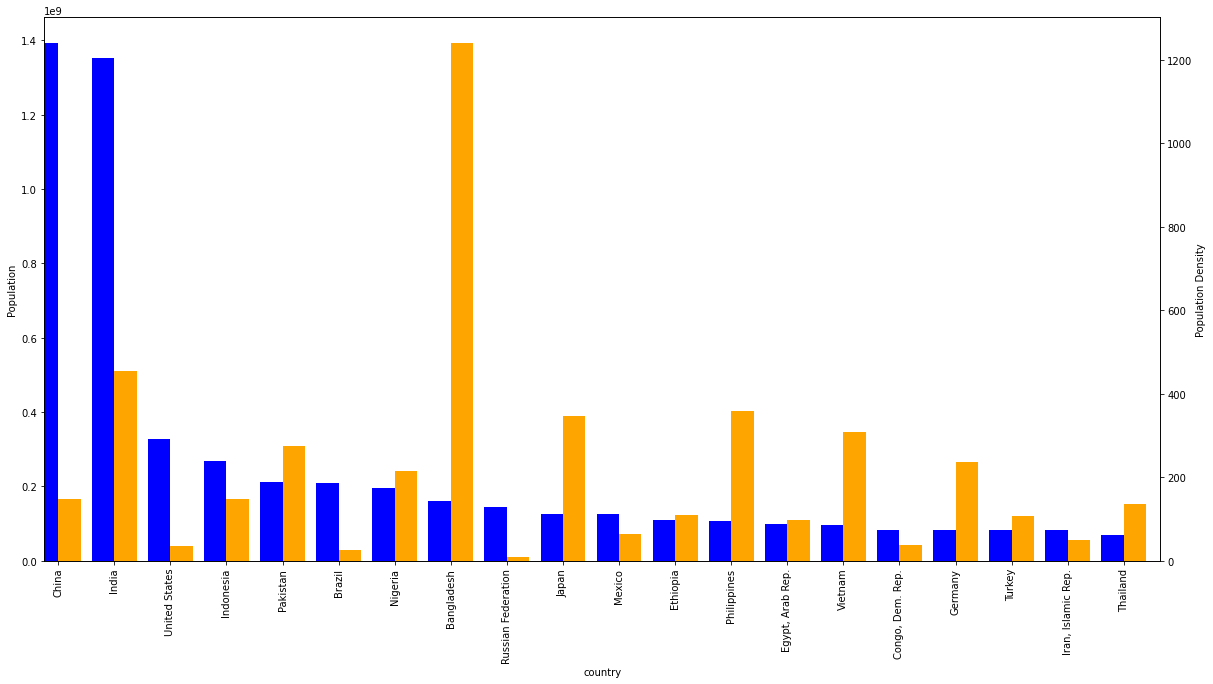

In [10]:
df = wbdb.get_data().drop(AGGREGATES).nlargest(20, "Population")

_, ax = plt.subplots(figsize=(20, 10))
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

df["Population"].plot(kind='bar', color='blue', ax=ax, position=1, width=0.4)
df["Population Density"].plot(kind='bar', color='orange', ax=ax2, position=0, width=0.4)

ax.set_ylabel('Population')
ax2.set_ylabel('Population Density')

plt.show()

### YouGov Behavioural Tracker/

In [11]:
from covid19_datasets import YouGovBehaviouralTracker

In [12]:
ygbt = YouGovBehaviouralTracker()

INFO:covid19_datasets.yougov_behavioural_tracker:Loading dataset
ERROR:covid19_datasets.yougov_behavioural_tracker:ERROR WITH finland
INFO:covid19_datasets.yougov_behavioural_tracker:Loaded


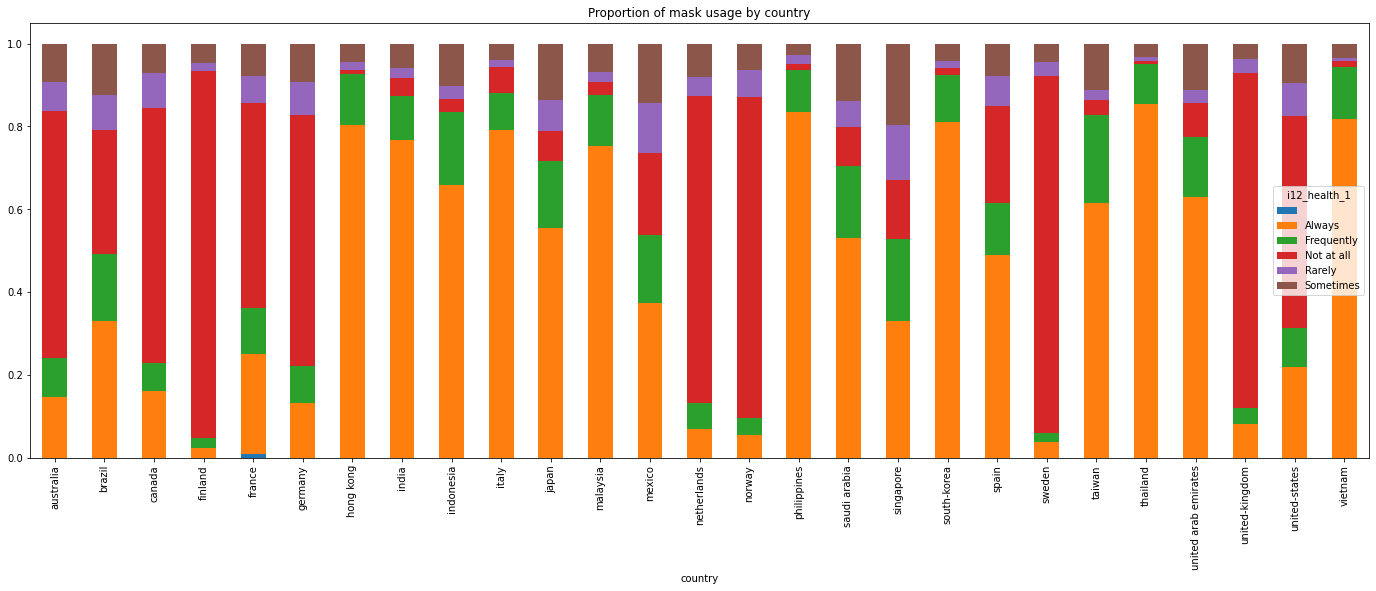

In [14]:
fig, ax = plt.subplots(figsize=(24, 8))
mask_question = 'i12_health_1'
counts = ygbt.data[['country', mask_question, 'RecordNo']].groupby(['country', mask_question]).count().unstack()
normalised_counts = counts.div(counts.sum(axis=1), axis=0)
normalised_counts['RecordNo'].plot(kind='bar', stacked=True, ax=ax)
plt.title('Proportion of mask usage by country');